## Hypothesis 1 : Average monthly temperature in Corpus Christi over 30 years follows a normal distribution.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from scipy.stats import probplot
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import ttest_rel


Reading Data From : Dataset containing Minimum and Maximum Temperature in degree celsius over 30 Years (Jan 1994 - Jan 2024) of Corpus Christi.
 https://climate.northwestknowledge.net/NWTOOLBOX/formattedDownloads.php

In [2]:
temp_df = pd.read_csv("/content/corpus_christi_temp_data.csv",header=0, parse_dates=True, skiprows= 9)

In [3]:
temp_df

,Year,Month,Day,tmmn(degC),tmmx(degC)
0,1994,1,1,12.75,22.85
1,1994,1,2,9.75,23.95
2,1994,1,3,6.25,18.45
3,1994,1,4,6.45,20.65
4,1994,1,5,5.65,20.25
...,...,...,...,...,...
10983,2024,1,27,10.15,19.15
10984,2024,1,28,8.45,19.45
10985,2024,1,29,7.75,20.45
10986,2024,1,30,10.05,21.05


Adding date column


In [4]:
temp_df['Date'] = pd.to_datetime(temp_df[['Year', 'Month', 'Day']])

In [5]:
temp_df.set_index('Date', inplace=True)
temp_df

,Year,Month,Day,tmmn(degC),tmmx(degC)
Date,,,,,
1994-01-01,1994,1,1,12.75,22.85
1994-01-02,1994,1,2,9.75,23.95
1994-01-03,1994,1,3,6.25,18.45
1994-01-04,1994,1,4,6.45,20.65
1994-01-05,1994,1,5,5.65,20.25
...,...,...,...,...,...
2024-01-27,2024,1,27,10.15,19.15
2024-01-28,2024,1,28,8.45,19.45
2024-01-29,2024,1,29,7.75,20.45


Adding Tavg Column for Average Temperature of the data

In [6]:
temp_df['tavg'] = (temp_df['tmmn(degC)'] + temp_df['tmmx(degC)']) / 2

In [7]:
temp_df

,Year,Month,Day,tmmn(degC),tmmx(degC),tavg
Date,,,,,,
1994-01-01,1994,1,1,12.75,22.85,17.80
1994-01-02,1994,1,2,9.75,23.95,16.85
1994-01-03,1994,1,3,6.25,18.45,12.35
1994-01-04,1994,1,4,6.45,20.65,13.55
1994-01-05,1994,1,5,5.65,20.25,12.95
...,...,...,...,...,...,...
2024-01-27,2024,1,27,10.15,19.15,14.65
2024-01-28,2024,1,28,8.45,19.45,13.95
2024-01-29,2024,1,29,7.75,20.45,14.10


#Plotting Histogram for Monthly average of tavg over 30 years(Jan 1994- Jan 2024)

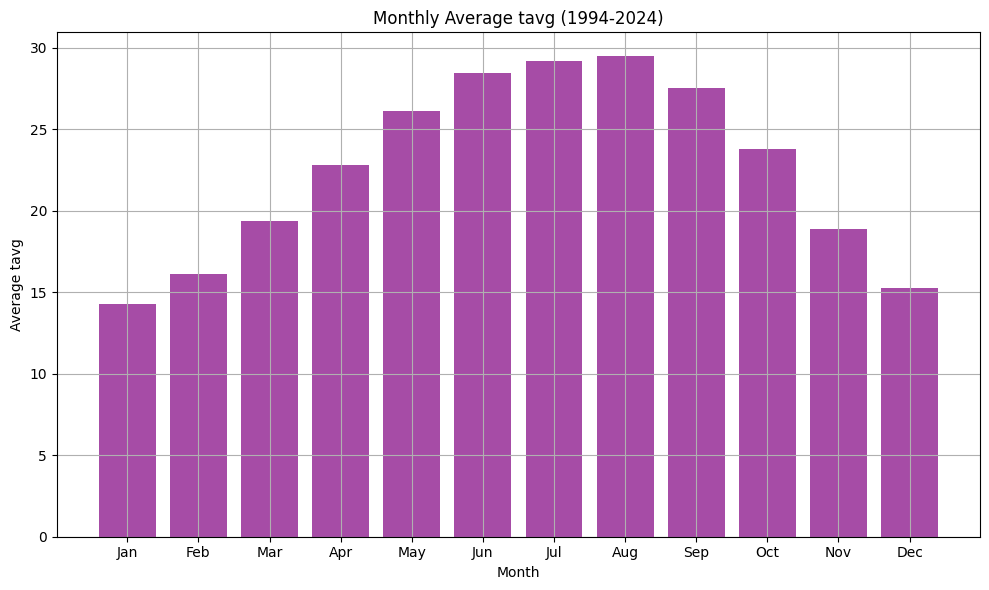

In [ ]:
# Calculate monthly mean for 'tavg'
monthly_mean_tavg = temp_df.groupby('Month')['tavg'].mean()

# Plot histogram for 'tavg'
plt.figure(figsize=(10, 6))

plt.bar(monthly_mean_tavg.index, monthly_mean_tavg, color='purple', alpha=0.7)
plt.title('Monthly Average tavg (1994-2024)')
plt.xlabel('Month')
plt.ylabel('Average tavg(degC)')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names on x-axis
plt.grid(True)

plt.tight_layout()
plt.show()


#Plotting Histogram for Monthly average of tmin and tmax in degC over 30 years(Jan 1994- Jan 2024)

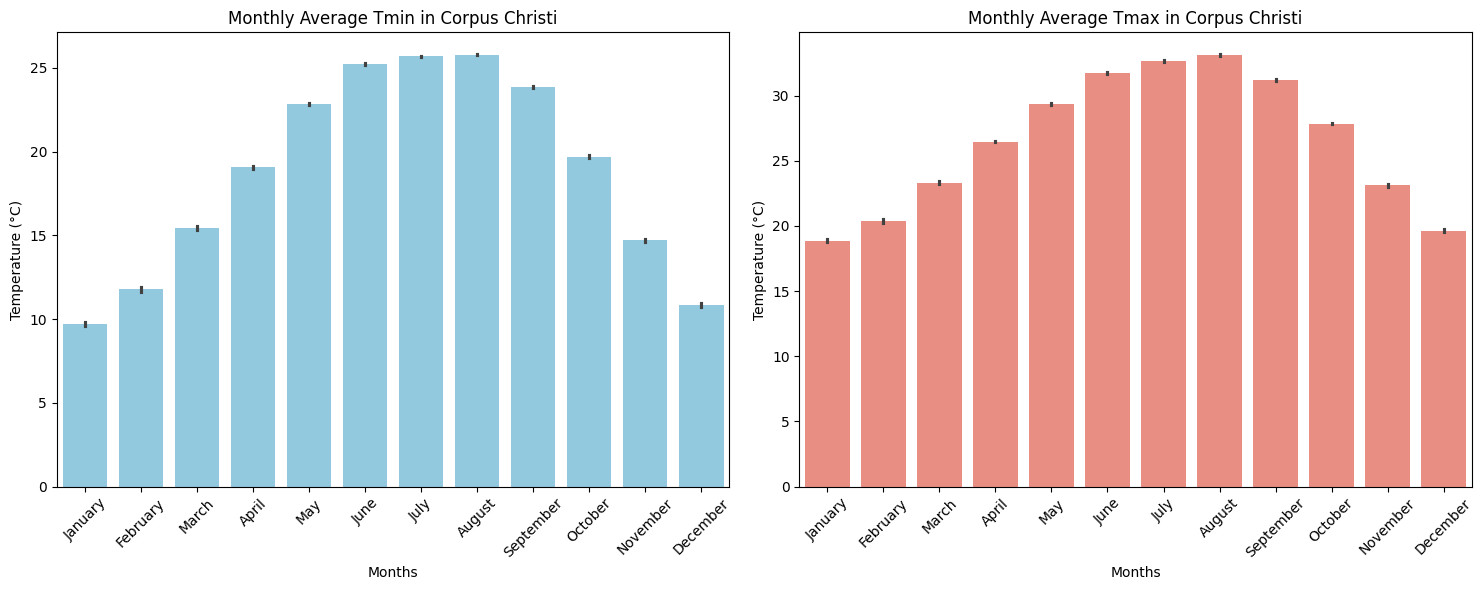

In [ ]:
temp_df['Date'] = pd.to_datetime(temp_df[['Year', 'Month', 'Day']])
# Calculate monthly averages for Tmin and Tmax
temp_df['Tmin_Monthly_Avg'] = temp_df.groupby(['Year', 'Month'])['tmmn(degC)'].transform('mean')
temp_df['Tmax_Monthly_Avg'] = temp_df.groupby(['Year', 'Month'])['tmmx(degC)'].transform('mean')

# Plot histograms for Tmin and Tmax
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=temp_df['Date'].dt.month_name(), y=temp_df['Tmin_Monthly_Avg'], color='skyblue')
plt.title('Monthly Average Tmin in Corpus Christi')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.subplot(1, 2, 2)
sns.barplot(x=temp_df['Date'].dt.month_name(), y=temp_df['Tmax_Monthly_Avg'], color='salmon')
plt.title('Monthly Average Tmax in Corpus Christi')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


#Plotting Q-Q Plot for Monthly average of tavg over 30 years(Jan 1994- Jan 2024)

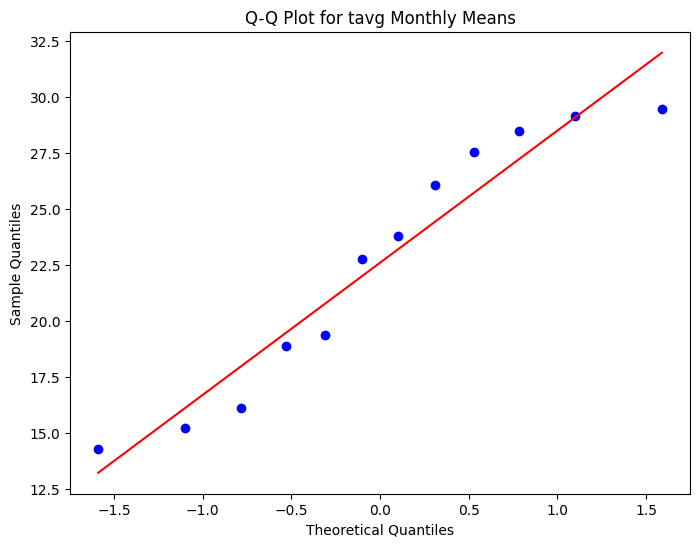

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'temp_df' is your DataFrame with the 'tavg' column

# Calculate monthly mean for 'tavg'
monthly_mean_tavg = temp_df.groupby('Month')['tavg'].mean()

# Create Q-Q plot for 'tavg'
plt.figure(figsize=(8, 6))
probplot(monthly_mean_tavg, plot=plt, dist='norm', fit=True)
plt.title('Q-Q Plot for tavg Monthly Means')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


#Shapiro-Wilk test

In [ ]:
from scipy.stats import shapiro

# Assuming 'temp_df' is your DataFrame with the 'tavg' column

# Calculate monthly mean for 'tavg'
monthly_mean_tavg = temp_df.groupby('Month')['tavg'].mean()

# Perform Shapiro-Wilk test for 'tavg' data
stat_tavg, p_value_tavg = shapiro(monthly_mean_tavg)

# Print the results
print(f'Shapiro-Wilk Test for tavg Monthly Means:')
print(f'Statistic: {stat_tavg}')
print(f'P-value: {p_value_tavg}')
print(f'Reject the null hypothesis: {p_value_tavg < 0.05}')


Shapiro-Wilk Test for tavg Monthly Means:
Statistic: 0.9058970212936401
P-value: 0.18896371126174927
Reject the null hypothesis: False


# Plotting Histogram for each month of tmin and tmax

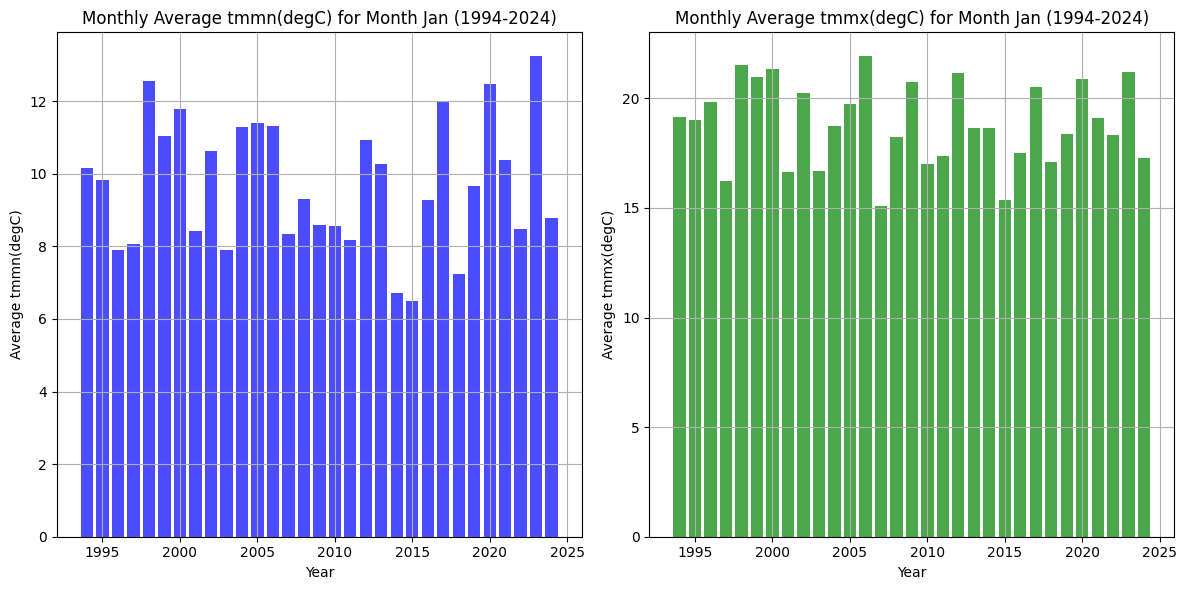

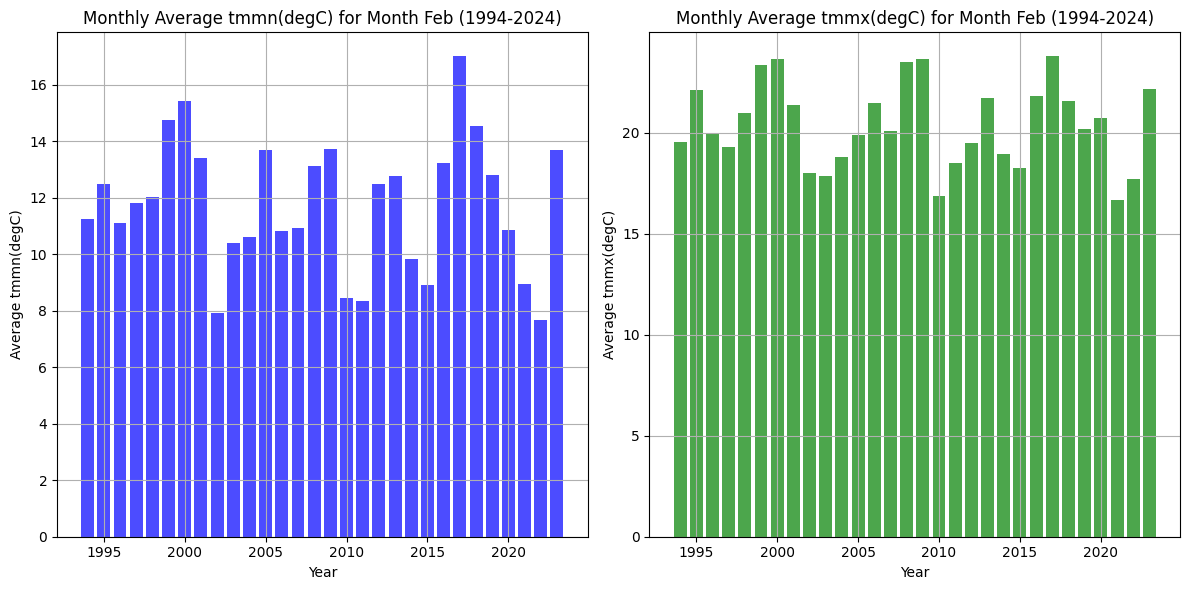

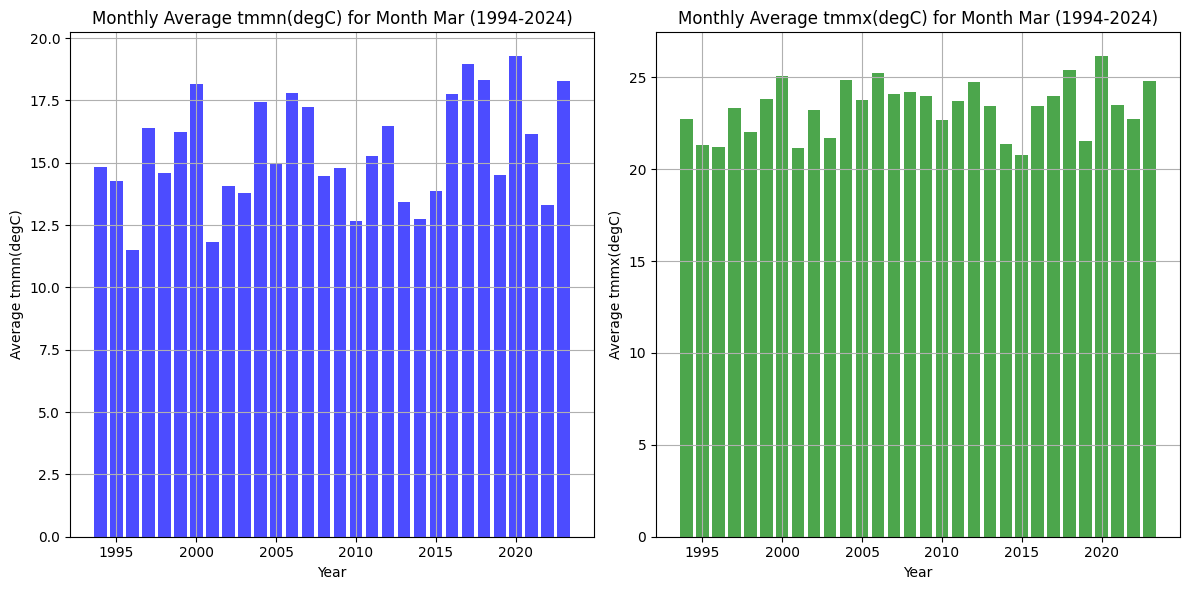

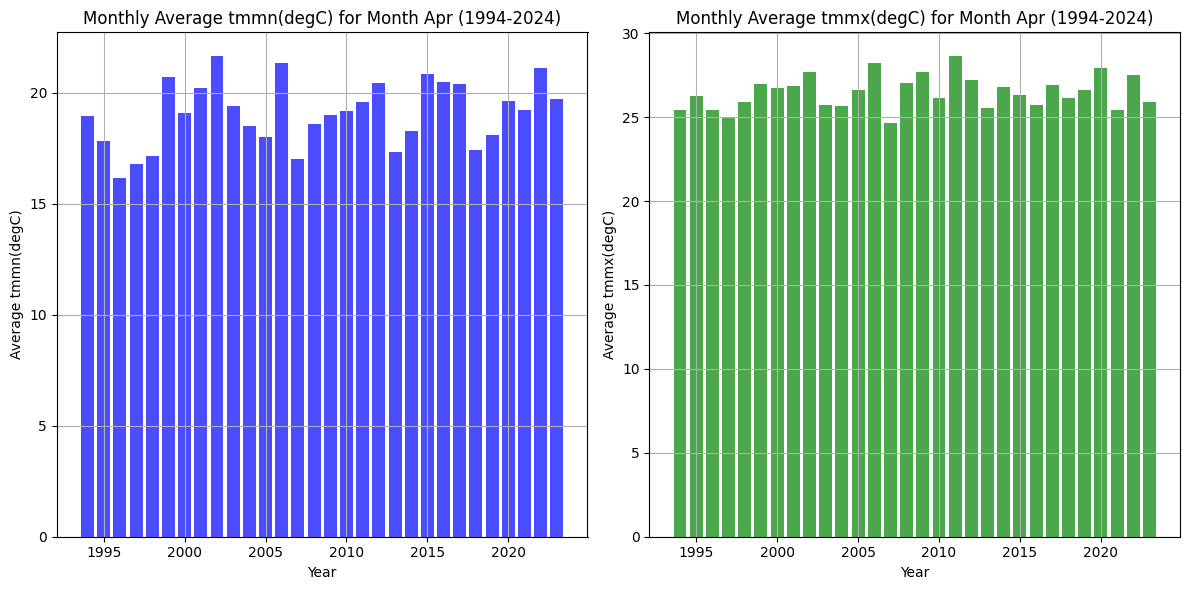

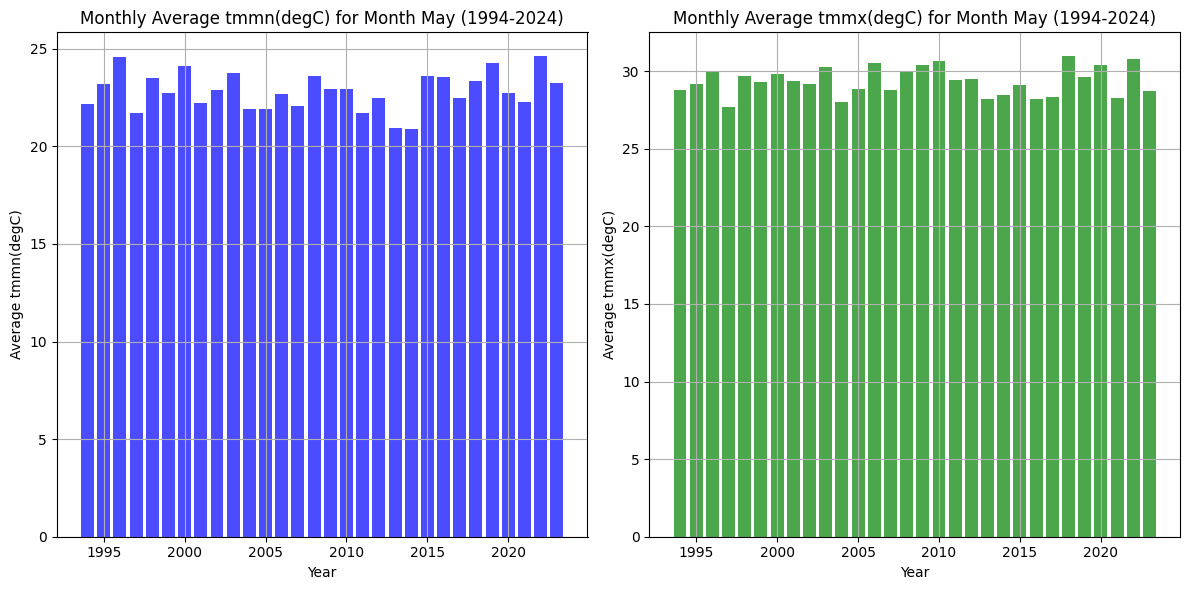

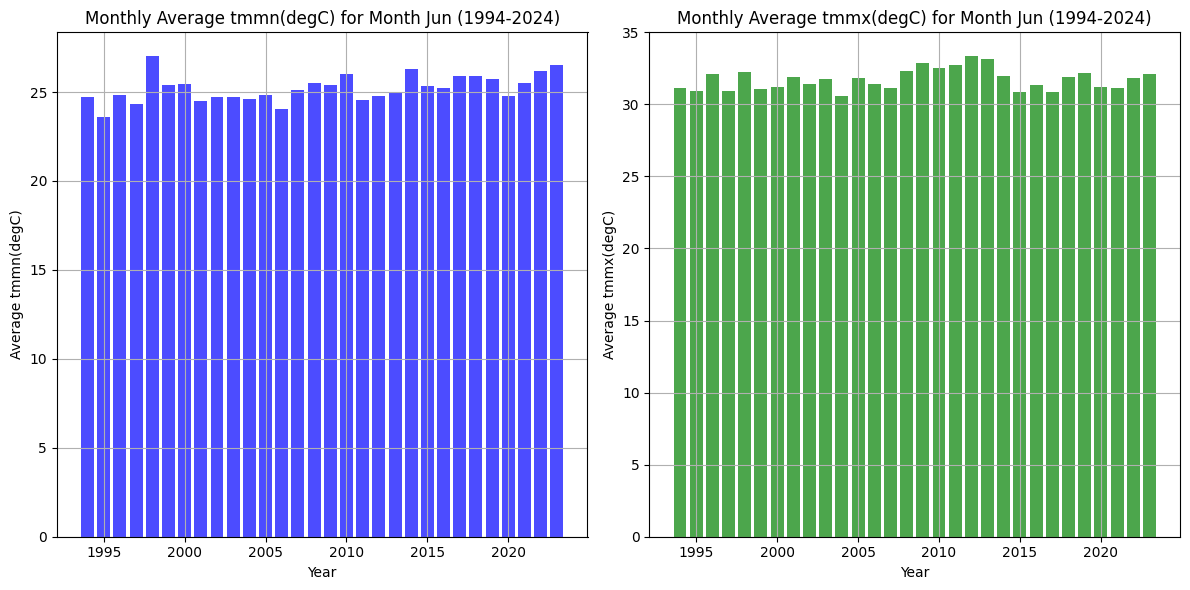

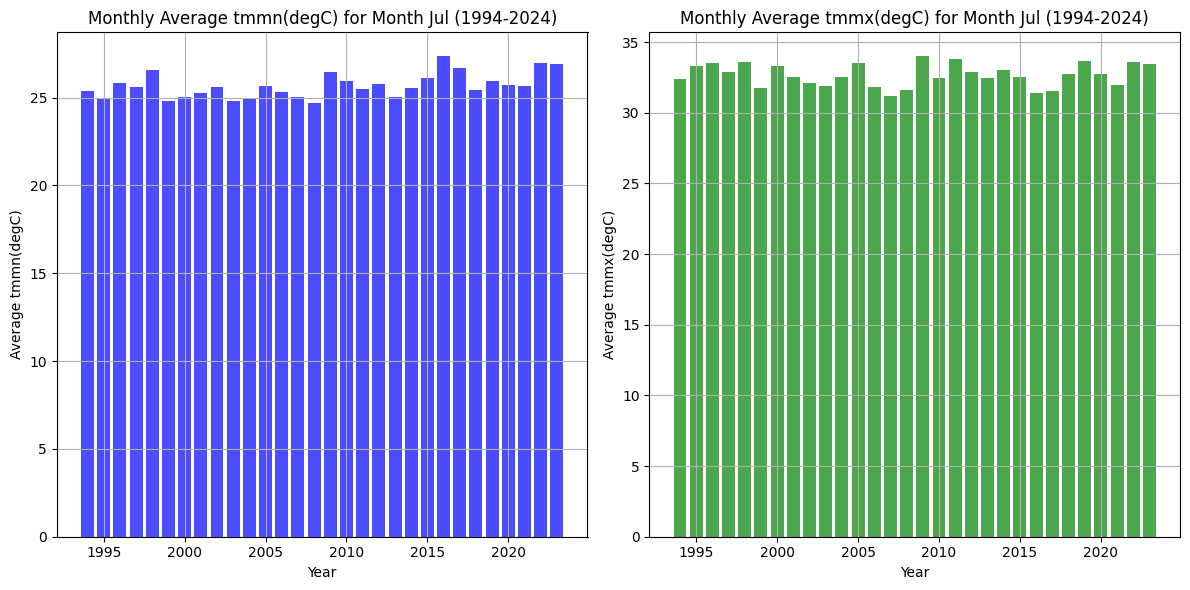

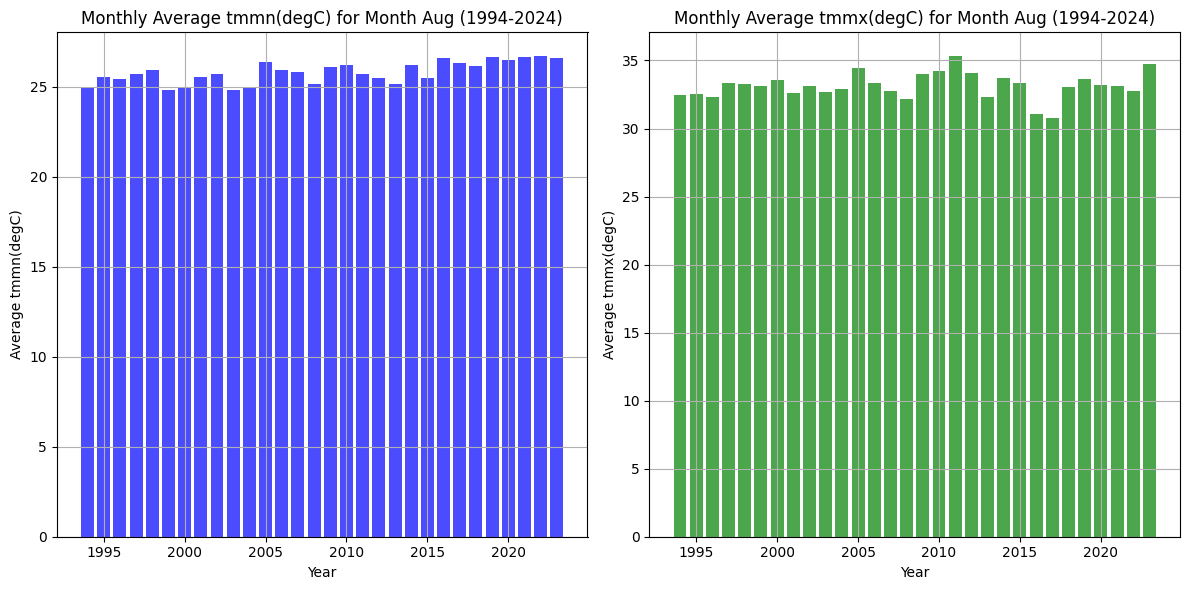

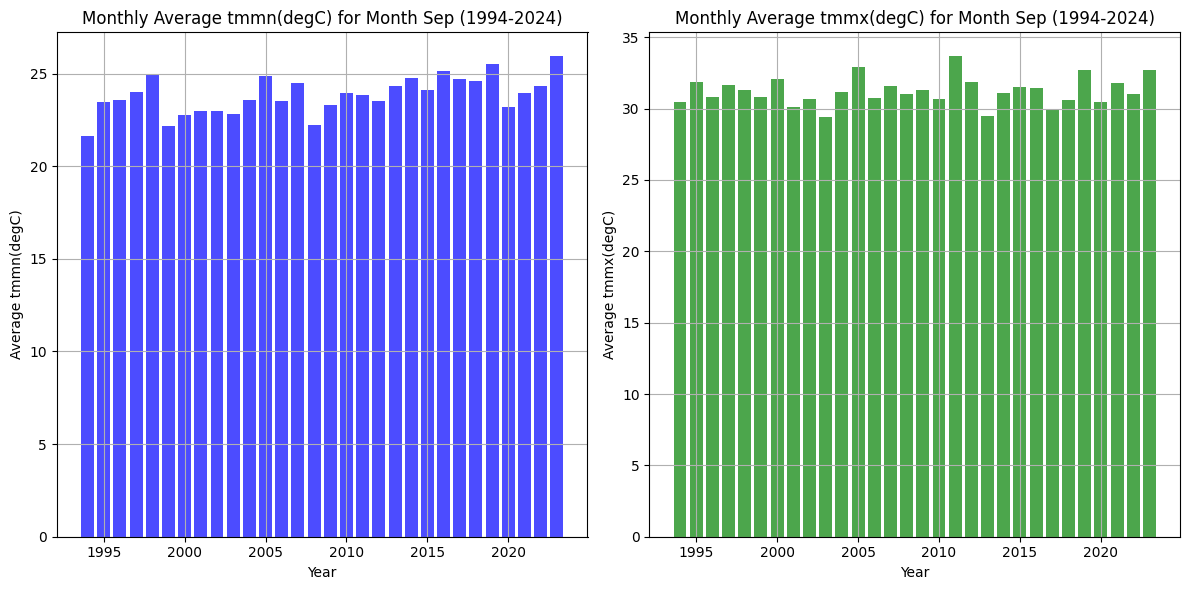

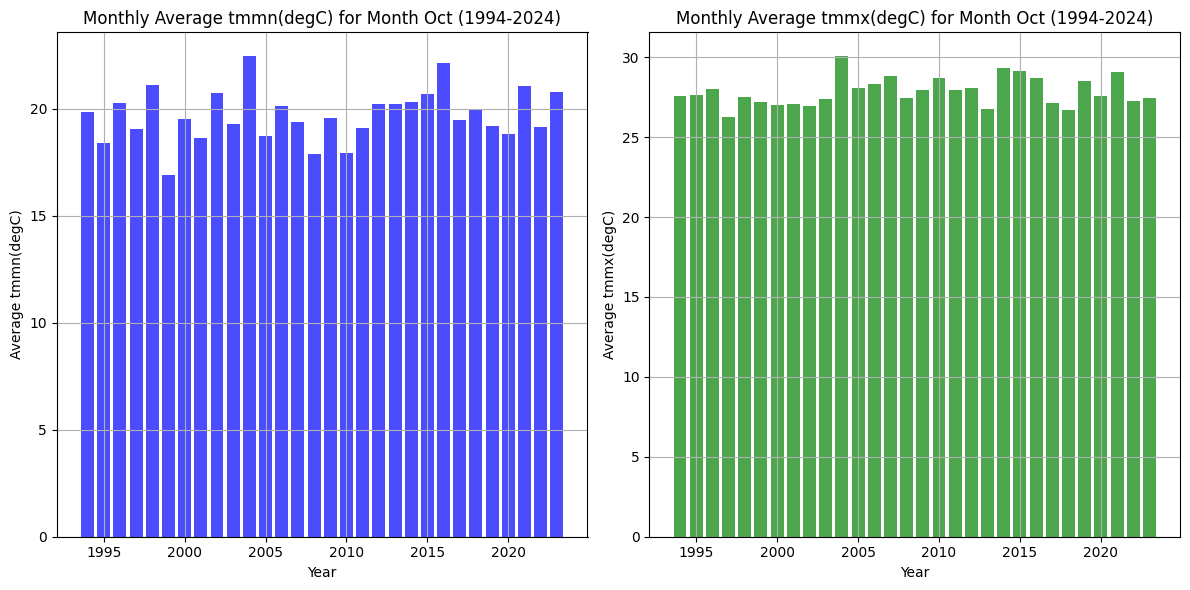

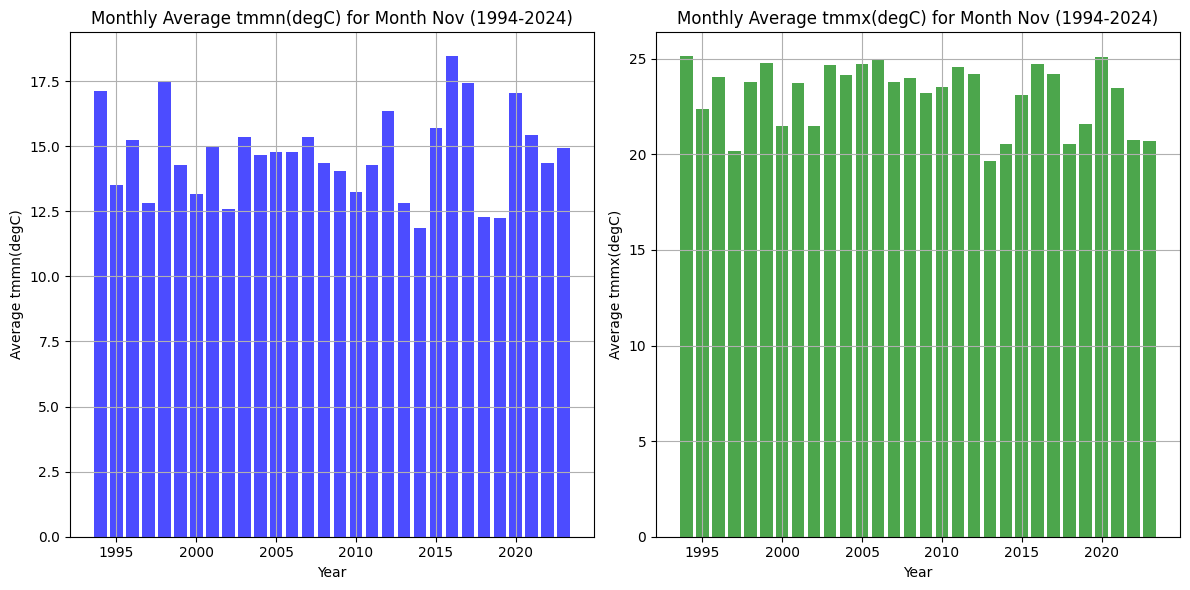

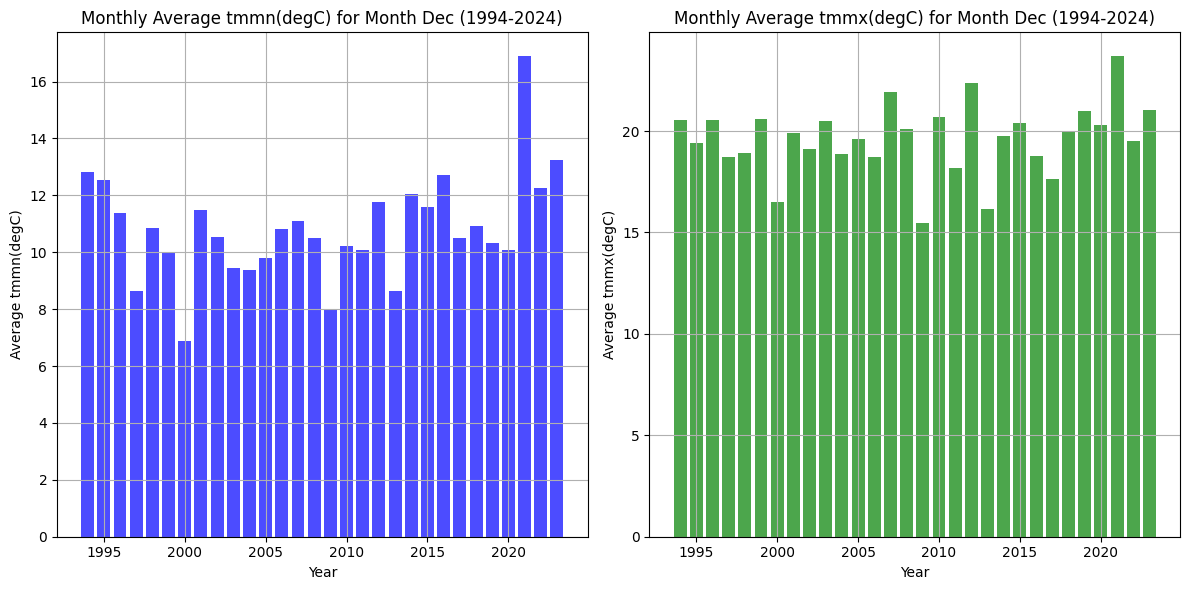

In [ ]:
# Iterate through each month and create histograms for 'tmmn(degC)' and 'tmmx(degC)'
for month in range(1, 13):
    # Filter data for the current month
    monthly_data = temp_df[temp_df.index.month == month]

    # Calculate monthly means for 'tmmn(degC)' and 'tmmx(degC)'
    monthly_means_tmmn = monthly_data.groupby('Year')['tmmn(degC)'].mean()
    monthly_means_tmmx = monthly_data.groupby('Year')['tmmx(degC)'].mean()

    # Plot histograms for 'tmmn(degC)' and 'tmmx(degC)'
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(monthly_means_tmmn.index, monthly_means_tmmn, color='blue', alpha=0.7)
    plt.title(f'Monthly Average tmmn(degC) for Month {calendar.month_abbr[month]} (1994-2024)')
    plt.xlabel('Year')
    plt.ylabel('Average tmmn(degC)')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.bar(monthly_means_tmmx.index, monthly_means_tmmx, color='green', alpha=0.7)
    plt.title(f'Monthly Average tmmx(degC) for Month {calendar.month_abbr[month]} (1994-2024)')
    plt.xlabel('Year')
    plt.ylabel('Average tmmx(degC)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
